<a href="https://colab.research.google.com/github/AlbertoTavares13/Bolsa_valores/blob/main/cotac%C3%A3o_empresas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Python para Investimentos
Python para Investimentos é um conjunto de códigos e vídeos em que mostro como utilizar a linguagem de programação PYTHON através da ferramenta online Google Colab para fazer estudos no mercado financeiro.

Canal no Youtube: https://www.youtube.com/ricospeloacaso?sub_confirmation=1

In [1]:
!pip install yfinance --upgrade --no-cache-dir
import yfinance as yf

     |████████████████████████████████| 5.5MB 6.5MB/s 
  Created wheel for yfinance: filename=yfinance-0.1.55-py2.py3-none-any.whl size=22616 sha256=38544df94f851ef566f8268de211cd11eb2a6a7d75b4fa62235b55f255e8118c
  Stored in directory: /tmp/pip-ephem-wheel-cache-b9_o32l2/wheels/04/98/cc/2702a4242d60bdc14f48b4557c427ded1fe92aedf257d4565c
Successfully built yfinance
  Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [14]:
tickers = "ABEV3.SA ITSA4.SA WEGE3.SA USIM5.SA VALE3.SA"

carteira = yf.download(tickers, period="10y")["Adj Close"]

ibov = yf.download("^BVSP", period="10y")["Adj Close"]

[*********************100%***********************]  5 of 5 completed
[*********************100%***********************]  1 of 1 completed


In [15]:
carteira.dropna(inplace=True)
carteira

,ABEV3.SA,ITSA4.SA,USIM5.SA,VALE3.SA,WEGE3.SA
Date,,,,,
2011-02-24,5.154269,4.026247,18.121393,37.255676,4.948554
2011-02-25,5.084616,3.963024,17.702620,37.056087,4.787138
2011-02-28,5.216956,4.039558,18.083323,37.455254,4.830501
2011-03-01,5.313075,3.934288,17.417093,36.750065,4.893140
2011-03-02,5.499743,3.964268,18.035736,37.375420,5.001557
...,...,...,...,...,...
2021-02-18,14.790000,10.350000,14.830000,97.400002,83.379997
2021-02-19,14.890000,10.250000,14.970000,97.769997,83.239998
2021-02-22,14.580000,9.780000,14.990000,95.349998,82.720001


In [16]:
ibov.dropna(inplace=True)
ibov

Date
2011-02-24     66949.00000
2011-02-25     66903.00000
2011-02-28     67383.00000
2011-03-01     66243.00000
2011-03-02     67282.00000
                  ...     
2021-02-18    119140.00000
2021-02-19    118748.00000
2021-02-22    112668.00000
2021-02-23    115227.00000
2021-02-24    115667.78125
Name: Adj Close, Length: 2468, dtype: float64

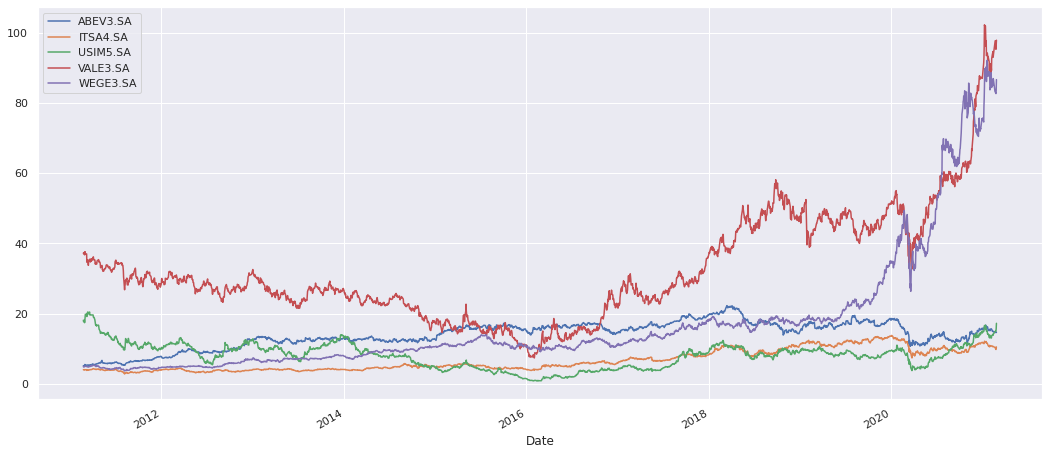

In [17]:
sns.set()
carteira.plot(figsize=(18,8));

In [18]:
carteira_normalizada = (carteira / carteira.iloc[0])*10000
carteira_normalizada.dropna(inplace=True)

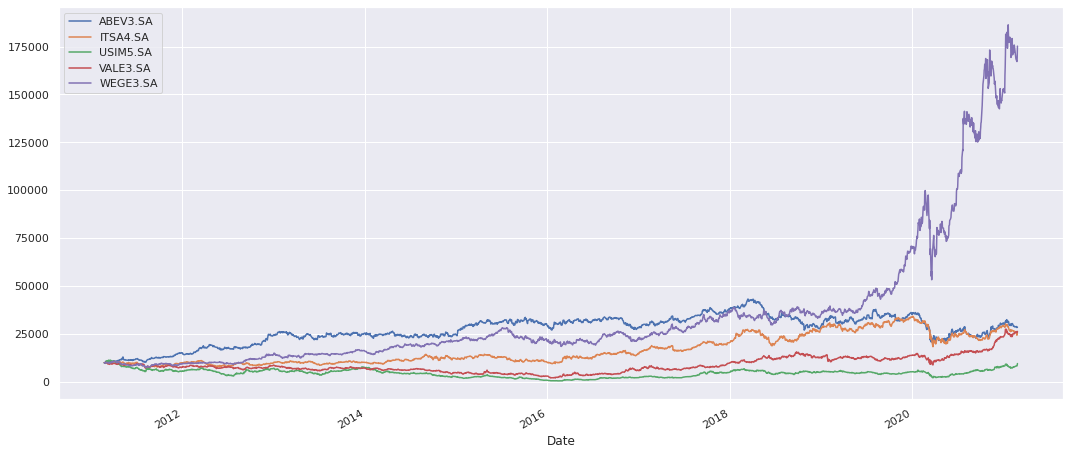

In [19]:
carteira_normalizada.plot(figsize=(18,8));

In [20]:
carteira_normalizada["saldo"] = carteira_normalizada.sum(axis=1)

In [21]:
carteira_normalizada

,ABEV3.SA,ITSA4.SA,USIM5.SA,VALE3.SA,WEGE3.SA,saldo
Date,,,,,,
2011-02-24,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,50000.000000
2011-02-25,9864.863415,9842.973140,9768.906482,9946.427284,9673.810715,49096.981036
2011-02-28,10121.620429,10033.061528,9978.991307,10053.569644,9761.439486,49948.682394
2011-03-01,10308.104532,9771.602355,9611.343389,9864.286071,9888.019411,49443.355758
2011-03-02,10670.268138,9846.063036,9952.731493,10032.140967,10107.107721,50608.311355
...,...,...,...,...,...,...
2021-02-18,28694.659388,25706.325380,8183.697444,26143.667564,168493.658140,257222.007916
2021-02-19,28888.674053,25457.954148,8260.954386,26242.979979,168210.748448,257061.311014
2021-02-22,28287.230072,24290.613148,8271.990792,25593.415023,167159.943225,253603.192261


In [22]:
ibov_normalizado = (ibov / ibov.iloc[0])*50000
ibov_normalizado

Date
2011-02-24    50000.000000
2011-02-25    49965.645491
2011-02-28    50324.127321
2011-03-01    49472.732976
2011-03-02    50248.696769
                  ...     
2021-02-18    88978.177419
2021-02-19    88685.417258
2021-02-22    84144.647418
2021-02-23    86055.803671
2021-02-24    86384.995482
Name: Adj Close, Length: 2468, dtype: float64

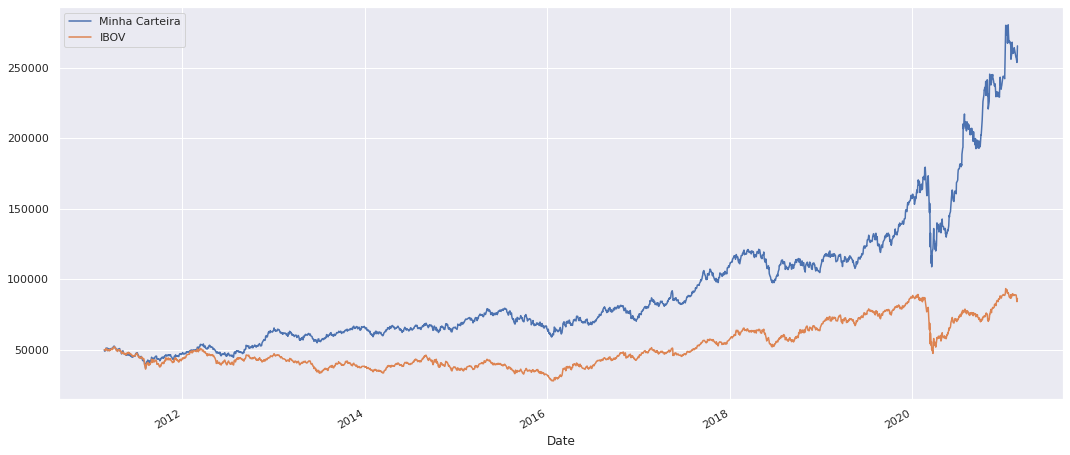

In [23]:
carteira_normalizada["saldo"].plot(figsize=(18,8), label="Minha Carteira")
ibov_normalizado.plot(label="IBOV")
plt.legend();

In [13]:
carteira_normalizada.describe()

,ABEV3.SA,ITSA4.SA,USIM5.SA,VALE3.SA,WEGE3.SA,saldo
count,1242.000000,1242.000000,1242.000000,1242.000000,1242.000000,1242.000000
mean,10474.631365,21912.336732,84024.278967,40229.657249,27915.450552,184556.354865
std,1411.826242,5780.228413,35867.228858,17719.431968,21856.367440,72897.906499
min,6804.244759,9984.986750,9780.221042,9393.679753,9831.676864,48688.033693
25%,9778.393350,17066.586112,50688.088576,26327.665027,14295.211920,119175.561252
50%,10555.717623,22042.051420,91679.890928,42938.436903,19084.821614,195094.677271
75%,11252.552256,26464.062676,107904.199712,49184.571240,30356.314607,218017.925808
max,14172.490368,33392.148991,195319.517183,102142.128442,99345.195743,425389.694188
